In [1]:
import pandas as pd
from mmcv import Config
config_path = '/Users/KC/My Drive/soundmouse/cfg_setting.py'
cfg = Config.fromfile(config_path)
df = pd.read_csv(cfg.filepath_load)
df.head(5)

,id,name,artists,duration_ms,popularity,release_date,tempo,key,liveness
0,4BJqT0PrAfrxzMOxytFOIz,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...","['Sergei Rachmaninoff', 'James Levine', 'Berli...",831667,4,1921,80.954,10,0.665
1,7xPhfUan2yNtyFG0cUWkt8,Clancy Lowered the Boom,['Dennis Day'],180533,5,1921,60.936,7,0.160
2,1o6I8BglA6ylDMrIELygv1,Gati Bali,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,500062,5,1921,110.339,3,0.101
3,3ftBPsC5vPBKxYSee08FDH,Danny Boy,['Frank Parker'],210000,3,1921,100.109,5,0.381
4,4d6HGyGT8e121BsdKmw9v6,When Irish Eyes Are Smiling,['Phil Regan'],166693,2,1921,101.665,3,0.229


In [8]:
from utils import *
sp = spotify_api(cfg)

In [3]:
track_id = '4BJqT0PrAfrxzMOxytFOIz'
res = sp.audio_features(track_id)
track= sp.track(track_id)


print('sample: ', track['preview_url'])
# print out a example of the audio_feature function
print('audio feature',res)

sample:  https://p.scdn.co/mp3-preview/8135db88d35b425950e52a58a95b2dd1437accc3?cid=f0967aa1c7064a36856282c85b3644a4
audio feature [{'danceability': 0.279, 'energy': 0.211, 'key': 10, 'loudness': -20.096, 'mode': 1, 'speechiness': 0.0366, 'acousticness': 0.982, 'instrumentalness': 0.878, 'liveness': 0.665, 'valence': 0.0594, 'tempo': 80.954, 'type': 'audio_features', 'id': '4BJqT0PrAfrxzMOxytFOIz', 'uri': 'spotify:track:4BJqT0PrAfrxzMOxytFOIz', 'track_href': 'https://api.spotify.com/v1/tracks/4BJqT0PrAfrxzMOxytFOIz', 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/4BJqT0PrAfrxzMOxytFOIz', 'duration_ms': 831667, 'time_signature': 4}]


In [4]:
audio_feats = create_data(cfg, sp, df)
audio_feats.head(5)

100%|██████████| 300/300 [00:58<00:00,  5.09it/s]


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,uri,track_href,analysis_url,duration_ms,time_signature,sample_audio,popularity,release_date,artists,name
0,0.279,0.211,10,-20.096,1,0.0366,0.982,0.878000,0.665,0.0594,...,spotify:track:4BJqT0PrAfrxzMOxytFOIz,https://api.spotify.com/v1/tracks/4BJqT0PrAfrx...,https://api.spotify.com/v1/audio-analysis/4BJq...,831667,4,NaN,NaN,NaN,NaN,"Piano Concerto No. 3 in D Minor, Op. 30: III. ..."
1,0.819,0.341,7,-12.441,1,0.4150,0.732,0.000000,0.160,0.9630,...,spotify:track:7xPhfUan2yNtyFG0cUWkt8,https://api.spotify.com/v1/tracks/7xPhfUan2yNt...,https://api.spotify.com/v1/audio-analysis/7xPh...,180533,4,NaN,NaN,NaN,NaN,Clancy Lowered the Boom
2,0.328,0.166,3,-14.850,1,0.0339,0.961,0.913000,0.101,0.0394,...,spotify:track:1o6I8BglA6ylDMrIELygv1,https://api.spotify.com/v1/tracks/1o6I8BglA6yl...,https://api.spotify.com/v1/audio-analysis/1o6I...,500062,4,NaN,NaN,NaN,NaN,Gati Bali
3,0.275,0.309,5,-9.316,1,0.0354,0.967,0.000028,0.381,0.1650,...,spotify:track:3ftBPsC5vPBKxYSee08FDH,https://api.spotify.com/v1/tracks/3ftBPsC5vPBK...,https://api.spotify.com/v1/audio-analysis/3ftB...,210000,3,NaN,NaN,NaN,NaN,Danny Boy
4,0.418,0.193,3,-10.096,1,0.0380,0.957,0.000002,0.229,0.2530,...,spotify:track:4d6HGyGT8e121BsdKmw9v6,https://api.spotify.com/v1/tracks/4d6HGyGT8e12...,https://api.spotify.com/v1/audio-analysis/4d6H...,166693,4,NaN,NaN,NaN,NaN,When Irish Eyes Are Smiling


In [9]:
selected_cols = cfg.selected_cols
audio_fts = audio_feats[selected_cols]
audio_fts

,name,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",0.279,0.211,10,-20.096,0.0366,0.982,0.878000,0.6650,0.0594,80.954
1,Clancy Lowered the Boom,0.819,0.341,7,-12.441,0.4150,0.732,0.000000,0.1600,0.9630,60.936
2,Gati Bali,0.328,0.166,3,-14.850,0.0339,0.961,0.913000,0.1010,0.0394,110.339
3,Danny Boy,0.275,0.309,5,-9.316,0.0354,0.967,0.000028,0.3810,0.1650,100.109
4,When Irish Eyes Are Smiling,0.418,0.193,3,-10.096,0.0380,0.957,0.000002,0.2290,0.2530,101.665
...,...,...,...,...,...,...,...,...,...,...,...
295,Skip The Gutter,0.653,0.131,8,-19.164,0.0628,0.977,0.733000,0.6000,0.5930,124.100
296,Changeable Daddy Of Mine,0.583,0.214,10,-13.687,0.0423,0.994,0.000033,0.4460,0.6470,101.916
297,"Chinatown, My Chinatown",0.562,0.525,3,-8.992,0.1420,0.945,0.094900,0.1290,0.7940,158.373
298,My Sweet,0.741,0.284,3,-10.406,0.0505,0.927,0.078800,0.0633,0.8160,105.840


In [15]:
#data preparation and preprocessiong                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            
print('is there null value?:\n', audio_fts.isna().sum()) # check null values

is there null value?:
 name                0
danceability        0
energy              0
key                 0
loudness            0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
dtype: int64


In [24]:
data_only = audio_fts.drop(columns=['name'], axis=1)
data_only = normalisation(data_only,opt_min_max=False)
data_only.head(4)
# print(data_only.shape)


,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,-1.288658,-0.138939,1.480544,-0.628816,-0.589256,0.332476,1.335133,2.773750,-1.660926,-0.758977
1,2.058420,0.790872,0.589843,0.673208,3.844135,-1.071988,-0.891339,-0.356126,1.940276,-1.398021
2,-0.984942,-0.460797,-0.59776,0.263466,-0.620890,0.214501,1.423888,-0.721795,-1.740634,0.179093
3,-1.313451,0.561996,-0.003959,1.204733,-0.603315,0.248208,-0.891268,1.013582,-1.240069,-0.147484


In [13]:
corr = audio_fts.corr()['liveness']
print(corr)
print(type(corr))

danceability       -0.001778
energy              0.211874
loudness            0.094944
speechiness         0.165886
acousticness        0.096236
instrumentalness   -0.242182
liveness            1.000000
valence             0.110400
tempo              -0.000173
Name: liveness, dtype: float64
<class 'pandas.core.series.Series'>


                                                name  danceability  energy  \
0  Piano Concerto No. 3 in D Minor, Op. 30: III. ...         0.279   0.211   
1                            Clancy Lowered the Boom         0.819   0.341   
2                                          Gati Bali         0.328   0.166   
3                                          Danny Boy         0.275   0.309   
4                        When Irish Eyes Are Smiling         0.418   0.193   

  key  loudness  speechiness  acousticness  instrumentalness  liveness  \
0  10   -20.096       0.0366         0.982          0.878000     0.665   
1   7   -12.441       0.4150         0.732          0.000000     0.160   
2   3   -14.850       0.0339         0.961          0.913000     0.101   
3   5    -9.316       0.0354         0.967          0.000028     0.381   
4   3   -10.096       0.0380         0.957          0.000002     0.229   

   valence    tempo  
0   0.0594   80.954  
1   0.9630   60.936  
2   0.0394  110.339 

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

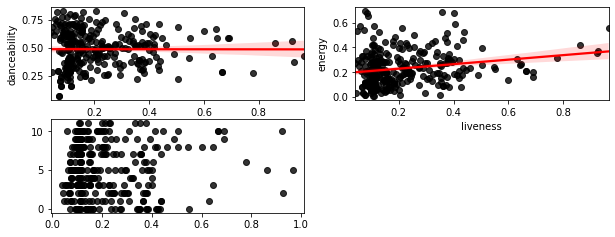

In [30]:
liveness = audio_fts['liveness']
plot_fts = audio_fts.drop(columns=cfg.drop_cols, axis=1)
print(audio_fts.head(5))
matplotlib.rcParams['figure.figsize'] = [10, 10]

fig= plt.figure(figsize=(10, 10))

for i, item in enumerate(plot_fts):
    print(item)
    print(i)
    fig.add_subplot(5,2,i+1)
    ax = sns.regplot(x=liveness, y=plot_fts[item], scatter_kws={"color": "black"}, line_kws={"color": "red"})

plt.show()
    

In [8]:
print(audio_fts.keys())
print(cfg.drop_cols)
plot_ft = audio_fts.drop(cfg.drop_cols, axis=1)
print(plot_ft.keys())

for i, item in enumerate(plot_ft):
    fig.add_subplot(4,2,i)
    ax = sns.regplot(x=, y=y, scatter_kws={"color": "black"}, line_kws={"color": "red"})
    print(plot_ft[item])

Index(['name', 'danceability', 'energy', 'key', 'loudness', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo'],
      dtype='object')
['name', 'liveness']
Index(['danceability', 'energy', 'key', 'loudness', 'speechiness',
       'acousticness', 'instrumentalness', 'valence', 'tempo'],
      dtype='object')
0      0.279
1      0.819
2      0.328
3      0.275
4      0.418
       ...  
295    0.653
296    0.583
297    0.562
298    0.741
299    0.780
Name: danceability, Length: 300, dtype: float64
0      0.211
1      0.341
2      0.166
3      0.309
4      0.193
       ...  
295    0.131
296    0.214
297    0.525
298    0.284
299    0.368
Name: energy, Length: 300, dtype: float64
0      10
1       7
2       3
3       5
4       3
       ..
295     8
296    10
297     3
298     3
299     5
Name: key, Length: 300, dtype: object
0     -20.096
1     -12.441
2     -14.850
3      -9.316
4     -10.096
        ...  
295   -19.164
296   -13.687
297    -8.992
298

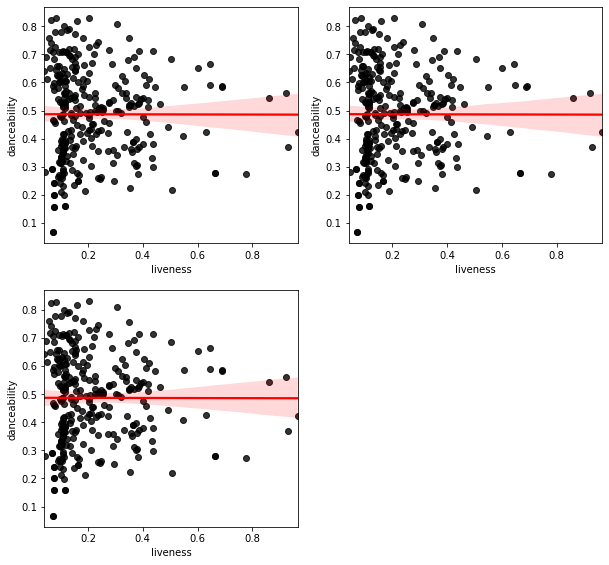

In [51]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.figsize'] = [10, 10]

x = audio_ft['liveness']

y = audio_ft['danceability']
# plt.figure(figsize=(20,20))
fig= plt.figure(figsize=(10, 20))
fig.add_subplot(4,2,1)
ax = sns.regplot(x=x, y=y, scatter_kws={"color": "black"}, line_kws={"color": "red"})
fig.add_subplot(4,2,2)
ax = sns.regplot(x=x, y=y, scatter_kws={"color": "black"}, line_kws={"color": "red"})
fig.add_subplot(4,2,3)
ax = sns.regplot(x=x, y=y, scatter_kws={"color": "black"}, line_kws={"color": "red"})

plt.show()


